The **Nobel Prize** has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

My case study "The History of Nobel Prize Winners" involves the use of Python, including libraries such as **Seaborn, Pandas, NumPy, and Matplotlib**.

**During the analysis, I answer the following questions:**
1. What is the most commonly awarded gender?
2. What is the most commonly awarded birth country?
3. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
4. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
5. Who was the first woman to receive a Nobel Prize, and in what category?
6. Which individuals or organizations have won more than one Nobel Prize throughout the years?

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


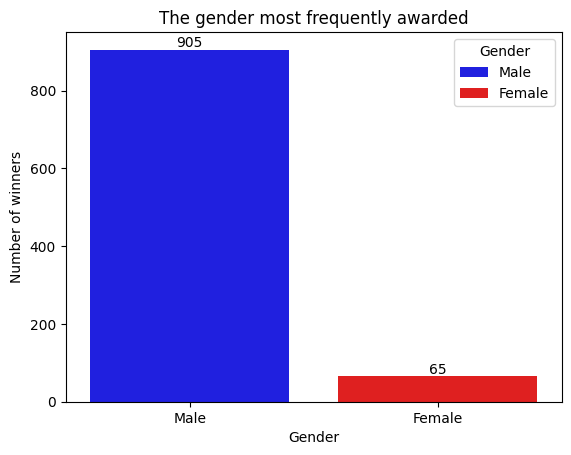

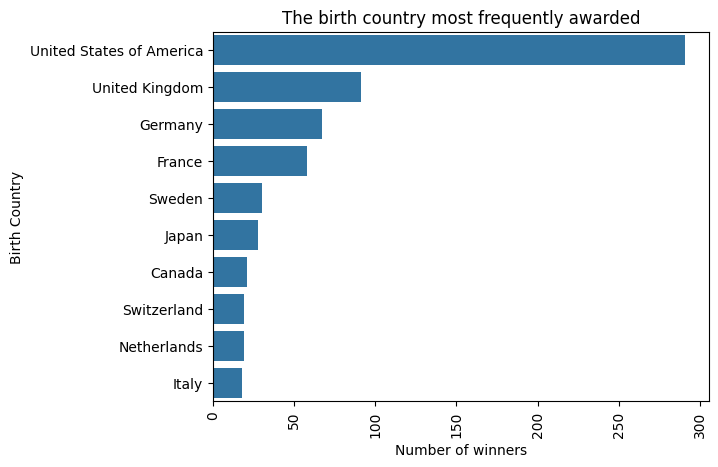

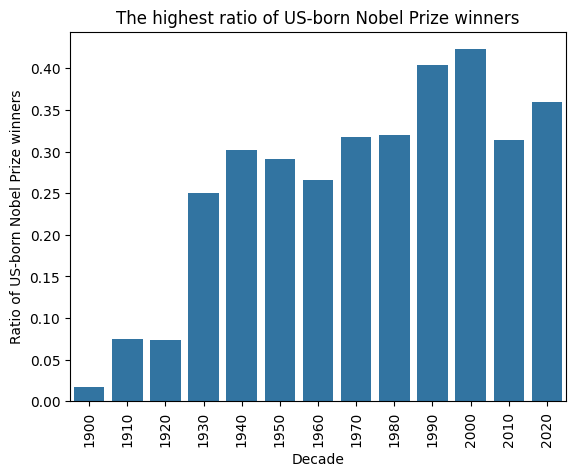

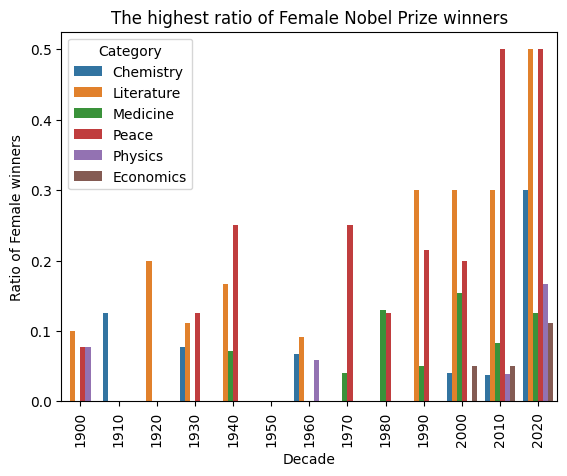

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nobel_data = pd.read_csv("data/nobel.csv")
print(nobel_data.columns)
# What is the most commonly awarded gender?
palette_colors = {"Male": "blue", "Female": "red"}
g_gender = sns.countplot(data = nobel_data, 
                  x = "sex", 
                  hue = "sex", 
                  palette = palette_colors,
                  order=nobel_data['sex'].value_counts(ascending = False).index
                 )
g_gender.set_title("The gender most frequently awarded")
g_gender.set(xlabel = "Gender",
             ylabel = "Number of winners")
g_gender.get_legend().set_title("Gender")
cnt_by_gender = nobel_data['sex'].value_counts(ascending = False)
top_gender = cnt_by_gender.idxmax()
for i in range(len(cnt_by_gender)):
    g_gender.bar_label(g_gender.containers[i], label_type='edge')
plt.show()

# What is the most commonly awarded birth country?
cnt_by_birth_country = nobel_data['birth_country'].value_counts()
top_country = cnt_by_birth_country.idxmax()

top_10_countries_df = cnt_by_birth_country.head(10).reset_index()
top_10_countries_df.columns = ['birth_country', 'count']

g_birth_country = sns.barplot(data = top_10_countries_df,
                               x = "count",
                               y = "birth_country")
g_birth_country.set_title("The birth country most frequently awarded")
g_birth_country.set(xlabel = "Number of winners",
                    ylabel = "Birth Country")
plt.xticks(rotation = 90)
plt.show()

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
def categorize_decade(year):
    return (year // 10 * 10)

def categorize_US_and_others(birth_country):
    if birth_country != "United States of America":
        return "Non-US"
    return birth_country

nobel_data['decade'] = nobel_data['year'].apply(categorize_decade)
nobel_data['country'] = nobel_data['birth_country'].apply(categorize_US_and_others)

summary_by_decade_country = nobel_data.groupby(['decade', 'country']).size().unstack(fill_value=0)
summary_by_decade_country['US_ratio'] = summary_by_decade_country['United States of America'] / (summary_by_decade_country['United States of America'] + summary_by_decade_country['Non-US'])

g_decade = sns.barplot(data = summary_by_decade_country, 
                  x = "decade", 
                  y = "US_ratio"
                 )
g_decade.set_title("The highest ratio of US-born Nobel Prize winners")
g_decade.set(xlabel = "Decade",
             ylabel = "Ratio of US-born Nobel Prize winners")
plt.xticks(rotation = 90)
plt.show()

max_decade_usa = summary_by_decade_country['US_ratio'].idxmax()


# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
summary_by_decade_female= nobel_data.groupby(['decade', 'category', 'sex']).size().unstack(fill_value=0)

summary_by_decade_female['Female_ratio'] = summary_by_decade_female['Female']/(summary_by_decade_female['Female'] + summary_by_decade_female['Male'])

g_female_ratio = sns.barplot(data = summary_by_decade_female,
                             x = "decade", 
                             y = "Female_ratio",
                             hue = "category")

g_female_ratio.set_title("The highest ratio of Female Nobel Prize winners")
g_female_ratio.set(xlabel = "Decade",
                   ylabel = "Ratio of Female winners")
plt.xticks(rotation = 90)
g_female_ratio.get_legend().set_title("Category")
plt.show()

max_ratio = summary_by_decade_female['Female_ratio'].max()
max_ratio_rows = summary_by_decade_female[summary_by_decade_female['Female_ratio'] == max_ratio]
max_ratio_rows_sort = max_ratio_rows.sort_values(['decade', 'category'], ascending = [False, True])
max_female_dict = {}
for index, row in max_ratio_rows_sort.iterrows():
    decade = index[0];
    category = index[1];
    break;
max_female_dict = {decade: category}

# Who was the first woman to receive a Nobel Prize, and in what category?
condition_is_woman = (nobel_data['sex'] == 'Female')
first_woman_nobel_prize = nobel_data[condition_is_woman]['year'].min()
first_woman_details = nobel_data[(nobel_data['sex'] == 'Female') & (nobel_data['year'] == first_woman_nobel_prize)]
first_woman_name = first_woman_details['full_name'].str.cat()
first_woman_category = first_woman_details['category'].str.cat()

# Which individuals or organizations have won more than one Nobel Prize throughout the years?
prizes_per_person = nobel_data['full_name'].value_counts()
multiple_winners = prizes_per_person[prizes_per_person > 1]
repeat_list = list(multiple_winners.index)
